In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('ggplot')

from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [50]:
cols = pd.read_csv('drive/MyDrive/MATH5470/cleaned_data.csv', index_col=0, nrows=0).columns.tolist()
exception_names = ["permno", "DATE", "RET", "SHROUT", "sic2", "mve0", "prc"]
characteristics_names = [col for col in cols if col not in exception_names]
len(characteristics_names)

102

In [51]:
results_pca = pd.read_csv("drive/MyDrive/MATH5470/project/results_PCA.csv")
results_pca['DATE'] = pd.to_datetime(results_pca['DATE'], format="%Y-%m-%d").dt.to_period("M").dt.to_timestamp()
results_pls = pd.read_csv("drive/MyDrive/MATH5470/project/results_PLS.csv")
results_pls['DATE'] = pd.to_datetime(results_pls['DATE'], format="%Y-%m-%d").dt.to_period("M").dt.to_timestamp()
vi_pca = pd.read_csv("drive/MyDrive/MATH5470/project/VI_PCA.csv", names=characteristics_names, header =None)
vi_pls = pd.read_csv("drive/MyDrive/MATH5470/project/VI_PLS.csv", names=characteristics_names, header =None)

In [52]:
results_pca["mkv"] = results_pca['SHROUT'] * results_pca['prc']
results_pca.head(5)

permno       DATE  SHROUT       prc       RET   RET_pcr          mkv
0   10000 1987-01-01    3893   0.40625 -0.212121  0.020109   1581.53125
1   10001 1987-01-01     991   6.75000 -0.035714  0.024969   6689.25000
2   10002 1987-01-01    1175  13.56250  0.095960  0.014353  15935.93750
3   10003 1987-01-01    2185  21.75000  0.129870  0.008956  47523.75000
4   10005 1987-01-01    4626   0.15625  0.666667  0.005666    722.81250

In [53]:
results_pls["mkv"] = results_pls['SHROUT'] * results_pls['prc']
results_pls.head(5)

permno       DATE  SHROUT       prc       RET   RET_pls          mkv
0   10000 1987-01-01    3893   0.40625 -0.212121  0.084004   1581.53125
1   10001 1987-01-01     991   6.75000 -0.035714  0.082367   6689.25000
2   10002 1987-01-01    1175  13.56250  0.095960  0.089785  15935.93750
3   10003 1987-01-01    2185  21.75000  0.129870  0.079021  47523.75000
4   10005 1987-01-01    4626   0.15625  0.666667  0.075558    722.81250

In [54]:
vi_pca

mvel1          beta        betasq     chmom    dolvol   idiovol  \
0  0.000045 -6.848670e-08  1.186219e-08  0.000197  0.000012  0.000007   

     indmom     mom1m     mom6m    mom12m  ...        bm     bm_ia       d_p  \
0  0.000236  0.000661  0.000029  0.000126  ...  0.000028 -0.000005  0.004444   

        e_p       b_m     ntis       tbl       tms       dfy      svar  
0  0.000024  0.000015 -0.00026  0.000922  0.001877  0.000772  0.006005  

[1 rows x 102 columns]

In [55]:
vi_pls

mvel1      beta    betasq     chmom    dolvol   idiovol    indmom  \
0 -0.000025 -0.000004 -0.000006  0.000177  0.000039 -0.000041  0.000229   

     mom1m     mom6m    mom12m  ...        bm     bm_ia       d_p       e_p  \
0  0.00074  0.000069  0.000087  ...  0.000033 -0.000017  0.004184  0.000777   

       b_m      ntis       tbl       tms       dfy      svar  
0  0.00002  0.001003  0.005228  0.001168  0.013674  0.013934  

[1 rows x 102 columns]

In [56]:
vi_pls.idxmax(axis=1)

0    svar
dtype: object

In [57]:
vi_pls['svar']

0    0.013934
Name: svar, dtype: float64

In [58]:
results_pca['mkvrank_dsc'] = results_pca.groupby('DATE')['mkv'].rank(ascending=False,na_option='bottom')
results_pca['mkvrank_asc'] = results_pca.groupby('DATE')['mkv'].rank(ascending=True,na_option='bottom')
results_pca

permno       DATE  SHROUT         prc       RET   RET_pcr  \
0         10000 1987-01-01    3893    0.406250 -0.212121  0.020109   
1         10001 1987-01-01     991    6.750000 -0.035714  0.024969   
2         10002 1987-01-01    1175   13.562500  0.095960  0.014353   
3         10003 1987-01-01    2185   21.750000  0.129870  0.008956   
4         10005 1987-01-01    4626    0.156250  0.666667  0.005666   
...         ...        ...     ...         ...       ...       ...   
2508780   93428 2016-12-01   30353   41.250000 -0.006024  0.016151   
2508781   93429 2016-12-01   81285   73.889999  0.072424  0.012555   
2508782   93433 2016-12-01    8995         NaN -0.127273 -0.006193   
2508783   93434 2016-12-01   17948    4.600000 -0.041667  0.021681   
2508784   93436 2016-12-01  161561  213.690002  0.128247  0.011910   

                  mkv  mkvrank_dsc  mkvrank_asc  
0        1.581531e+03       6426.0        178.0  
1        6.689250e+03       5625.0        979.0  
2        1.593594e+04       4677.0       1927.0  
3        4.752375e+04       3183.0       3421.0  
4        7.228125e+02       6550.0         54.0  
...               ...          ...          ...  
2508780  1.252061e+06       2001.0       3683.0  
2508781  6.006149e+06        758.0       4926.0  
2508782           NaN       5699.5       5699.5  
2508783  8.256080e+04       4598.0       1086.0  
2508784  3.452397e+07        159.0       5525.0  

[2508785 rows x 9 columns]

In [59]:
def compute_Roos(y_predict, y_test):
    y_predict_array = np.array(y_predict).reshape(-1)
    y_test_array = np.array(y_test).reshape(-1)
    SSE = np.sum((y_predict_array - y_test_array)**2)
    SST = np.sum(y_test_array**2)
    Roos = 1 - (SSE/SST)
    return Roos

index_top = (results_pca['mkvrank_dsc']<=1000)
index_bottom = (results_pca['mkvrank_asc']<=1000)

Roos = pd.DataFrame(np.zeros([2,3]), columns = ['all', 'top', 'bottom'], index=['pca','pls'])

Roos.loc['pca']['all'] = compute_Roos(results_pca['RET_pcr'], results_pca['RET'])
Roos.loc['pca']['top'] = compute_Roos(results_pca[index_top]['RET_pcr'], results_pca[index_top]['RET'])
Roos.loc['pca']['bottom'] = compute_Roos(results_pca[index_bottom]['RET_pcr'], results_pca[index_bottom]['RET'])

Roos.loc['pls']['all'] = compute_Roos(results_pls['RET_pls'], results_pls['RET'])
Roos.loc['pls']['top'] = compute_Roos(results_pls[index_top]['RET_pls'], results_pls[index_top]['RET'])
Roos.loc['pls']['bottom'] = compute_Roos(results_pls[index_bottom]['RET_pls'], results_pls[index_bottom]['RET'])
print(Roos)

          all       top    bottom
pca  0.012600  0.035990  0.000570
pls  0.012769  0.028331 -0.008982


<Axes: >

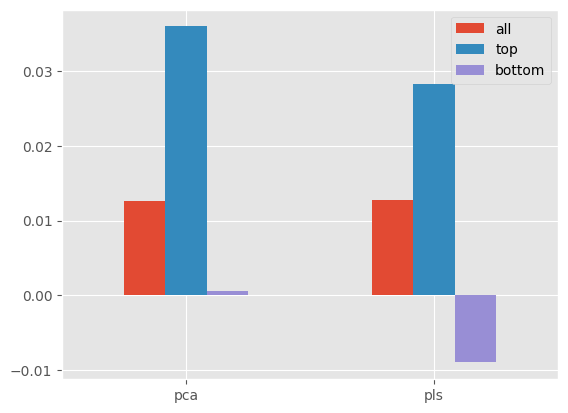

In [60]:
Roos.plot.bar(rot=0)

In [67]:
Roos_ols_rf = pd.read_csv("R2_oos.csv", index_col=0).T
Roos_ols_rf.columns = ["All", "Top-1000", "Bottom-1000"]
Roos_ols_rf.index.name = "Methods"
Roos_ols_rf

All  Top-1000  Bottom-1000
Methods                                 
OLS_3    0.000957  0.010686     0.002049
OLS     -0.011413 -0.009806    -0.001418
RF       0.001447  0.019203    -0.005648

In [68]:
Roos.columns = ["All", "Top-1000", "Bottom-1000"]
Roos.index = ['PCR', "PLS"]
Roos.index.name = "Methods"
Roos

All  Top-1000  Bottom-1000
Methods                                 
PCR      0.012600  0.035990     0.000570
PLS      0.012769  0.028331    -0.008982

In [69]:
Roos_enet_gbrt = pd.read_csv("oos_R2.csv", index_col=0)
Roos_enet_gbrt.columns = ["All", "Top-1000", "Bottom-1000"]
Roos_enet_gbrt.index = ['ENET', "GBRT"]
Roos_enet_gbrt.index.name = "Methods"
Roos_enet_gbrt

All  Top-1000  Bottom-1000
Methods                                 
ENET     0.002054  0.013407    -0.004705
GBRT     0.008187  0.036180    -0.003377

In [70]:
Roos = pd.concat([Roos_ols_rf, Roos,Roos_enet_gbrt], axis=0)
Roos

All  Top-1000  Bottom-1000
Methods                                 
OLS_3    0.000957  0.010686     0.002049
OLS     -0.011413 -0.009806    -0.001418
RF       0.001447  0.019203    -0.005648
PCR      0.012600  0.035990     0.000570
PLS      0.012769  0.028331    -0.008982
ENET     0.002054  0.013407    -0.004705
GBRT     0.008187  0.036180    -0.003377

In [71]:
Roos.plot.bar(rot=0)

<Axes: xlabel='Methods'>

In [72]:
vi_gbrt = pd.read_csv("GBRT_vi.csv").set_index(["var"], drop =True).T.reset_index(drop=True)
vi_enet= pd.read_csv("elastic_vi.csv").set_index(["var"], drop =True).T.reset_index(drop=True)
vi_rf = pd.read_csv("rf_vi.csv", index_col=0).set_index(["variable"], drop =True).T.reset_index(drop=True)

In [73]:
VIs = [vi_pca,vi_pls,vi_enet,vi_rf,vi_gbrt]
methods = ["PCR", "PLS","ENET","RF","GBRT"]

In [74]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 30))

for i, ax in enumerate(axs.flatten()):
  if i<5:
    multiplier = 1/np.sum(np.asarray(VIs[i]),axis=1)[0]
    to_plot = VIs[i].sort_values(by = 0, axis = 1, ascending = False).iloc[:,:20].sort_values(by = 0, axis = 1, ascending = True).T
    to_plot.columns = ["VI"]
    to_plot = to_plot * multiplier
    to_plot.plot.barh(title = methods[i], ax = ax, ylabel="")
    ax.get_legend().remove()
  else:
    ax.set_visible(False)

#for ax in axs.flatten():
#  ax.set_xlim([0, 0.01])

#plt.figlegend(handles=handles, loc = 'outside upper center')
# Displaying the plot
plt.show()